## S-PLUS: Accessing and Analyzing S-PLUS Data

In this workshop, we will focus on two essential tools for accessing and manipulating these data: splus.cloud and the splusdata package. splus.cloud is the official data distribution platform for S-PLUS, allowing researchers and enthusiasts to download catalogs and images directly from the cloud. The splusdata package, on the other hand, is a library in Python designed to facilitate the search and processing of these data efficiently, integrating into the development environment.

Throughout the workshop, you will learn how to use these tools to access, visualize, and analyze S-PLUS data, enabling you to explore the universe of possibilities offered by this survey.

---

### Register 

To access the data, you need to register on the splus.cloud platform. 

To do this, go to the [splus.cloud/register](https://splus.cloud/register). Fill in the required information and confirm your registration.

![image](../images/register.png)

### Installing splusdata

To install the splusdata package, you can use pip:

```bash
pip install splusdata
```

## Getting started

splus.cloud has a rich documentation that can be accessed at [splus.cloud/documentation](https://splus.cloud/documentation). There you will find all the information you need to start using the platform, including data information, how to download catalogs and images, and how to use the API.

![docs](../images/documentation.png)

## Logging in

The same user that you used to register on the splus.cloud platform will be used to log in to the splusdata package.

In [1]:
import splusdata

# This will ask for your S-PLUS username and password
conn = splusdata.Core()

#### In splus we have multiple tools to access catalogs and images. The main tools are:

- **Image tools**:
  - stamps: to get fits cutouts
  - field_frame: to get whole field fits
  - lupton_rgb: to create RGB images
  - trilogy_image: to create RGB images
  
<br/>

- **Catalog**:
  - query: TAP query to get catalogs
  - lsdb: fast data download

![image](../images/tools.png)

## Getting png images

- Lupton Image png image (combination of 3 filters)

https://splus.cloud/imagetools/3filter

![image](../images/lupton.png)

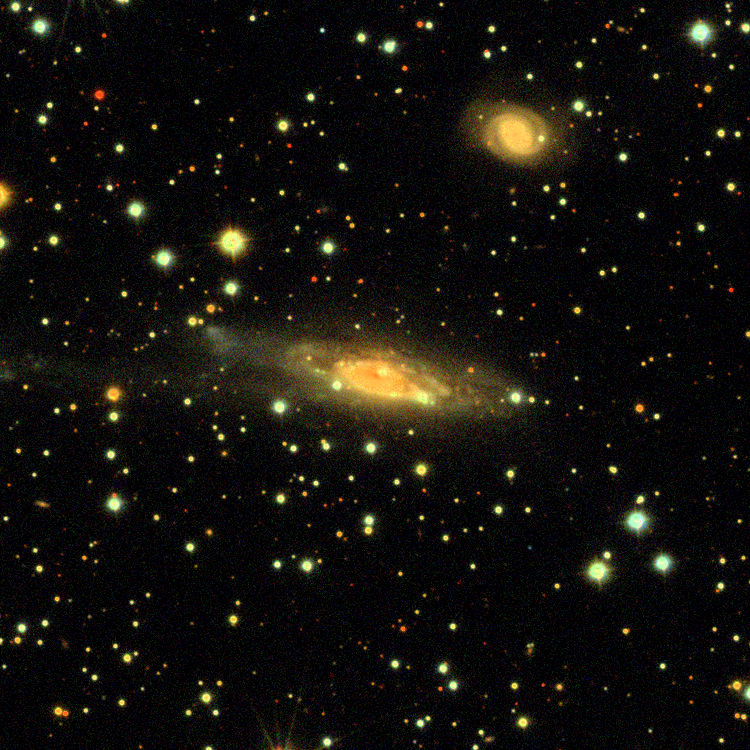

In [2]:
conn.lupton_rgb(
    ra = 157.3058167, 
    dec = -44.1229222,
    size = 750,
)

Now, it's also possible to choose the filters you want to use in the image.

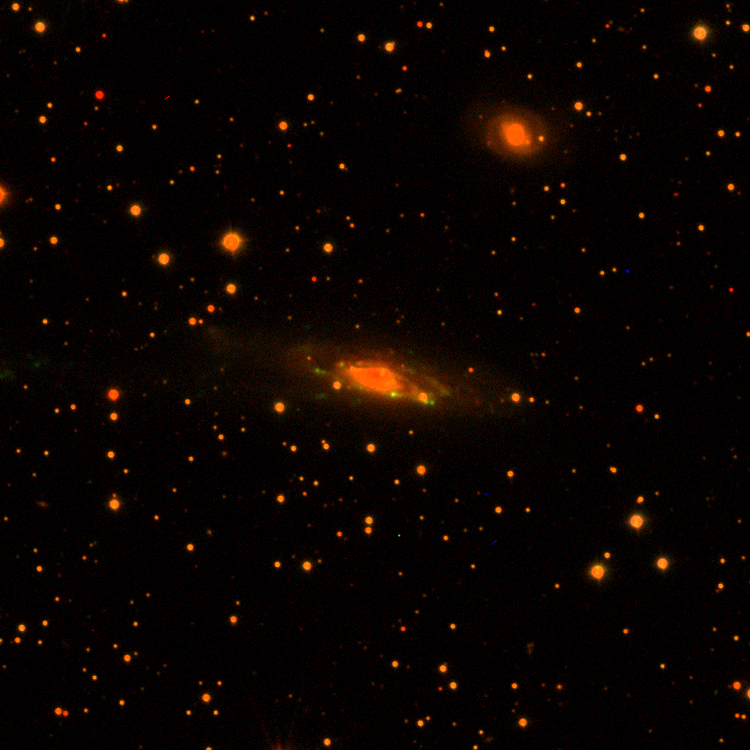

In [16]:
conn.lupton_rgb(
    ra = 157.3058167,
    dec = -44.1229222,
    size = 750,
    R = 'F861', 
    G = 'F660',
    B = 'U',
    stretch=2
)

--- 

- trilogy_image png image (combination of 12 filters)

https://splus.cloud/imagetools/12filter

![image](../images/trilogy.png)

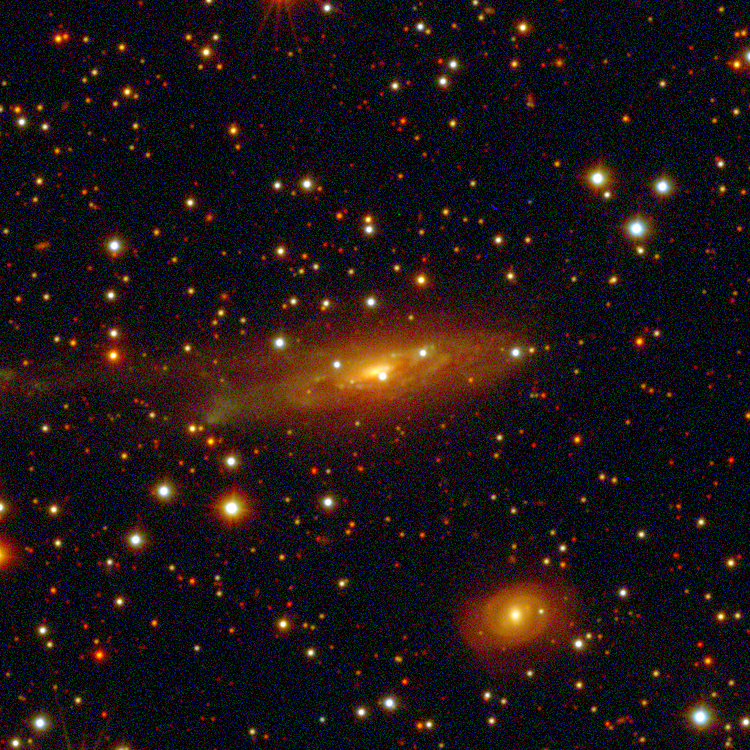

In [12]:
conn.trilogy_image(
    ra = 157.3058167,
    dec = -44.1229222,
    size = 750,
)

Here you can also choose the filters you want to use in the image. 

Also if you want to save the image, you may pass filename as a parameter. Or you may store the image in a variable and use it in your code.

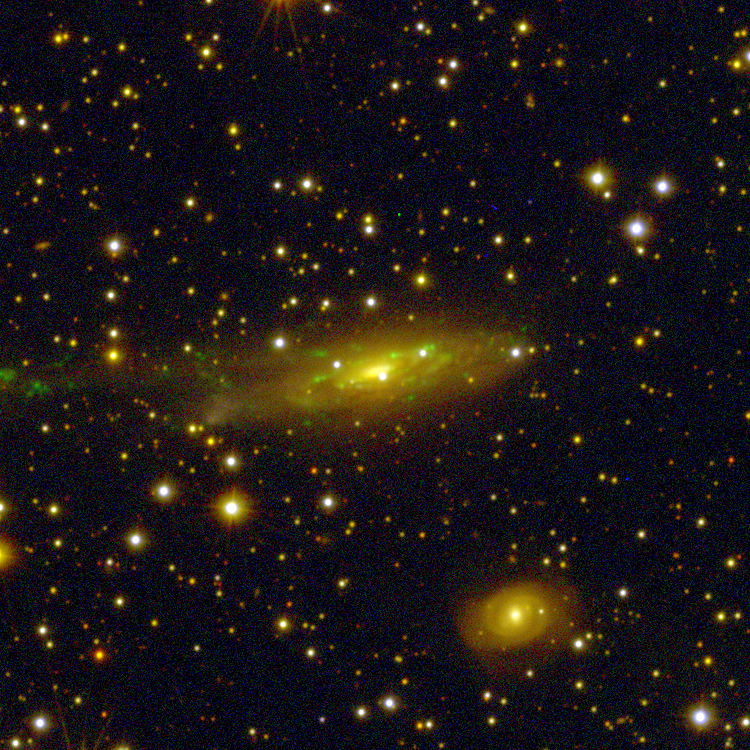

In [18]:
conn.trilogy_image(
    ra = 157.3058167,
    dec = -44.1229222,
    size = 750,
    R = "R,I,F861,Z",
    G = "F660",
    B = "U,F378,F395,F410,F430",
)

--- 

#### Getting FITS images

- cutouts (stamps)

https://splus.cloud/imagetools/FITScut

![image](../images/stamp.png)

In [32]:
stamp = conn.stamp(
    ra = 157.3058167,
    dec = -44.1229222,
    size = 750,
    band = 'r'
)

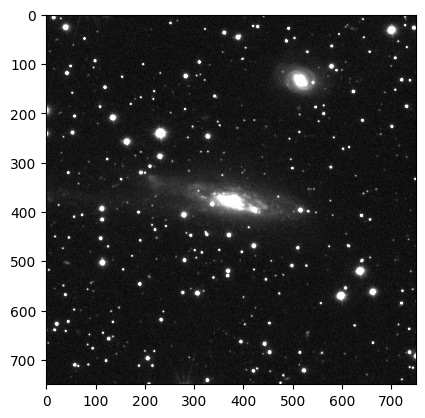

In [33]:
import numpy as np
import matplotlib.pyplot as plt

vmin, vmax = np.percentile(stamp[1].data, [1, 99])

plt.imshow(stamp[1].data, vmin=vmin, vmax=vmax, cmap='gray')
plt.show()

---

Getting the whole field fits image

https://splus.cloud/imagetools/FITStile

![image](../images/field_frame.png)

In [29]:
field = conn.field_frame(
    field = "HYDRA_0148",
    band = "R"
)

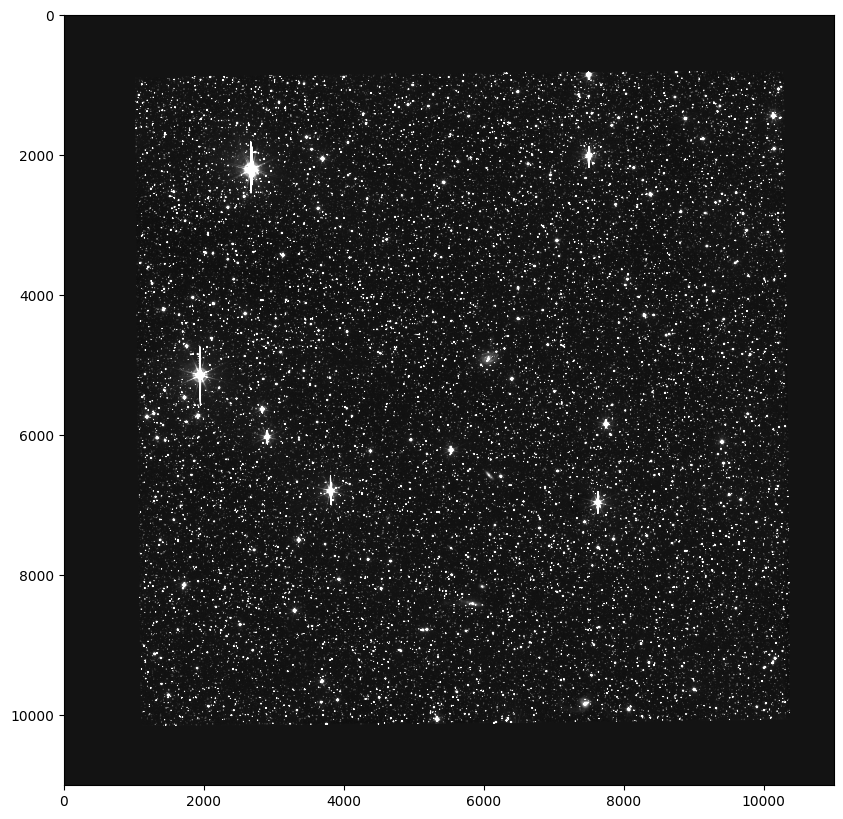

In [31]:
vmin, vmax = np.percentile(stamp[1].data, [1, 99])

plt.figure(figsize=(10,10))
plt.imshow(field[1].data, vmin=vmin, vmax=vmax, cmap='gray')
plt.show()

In [ ]:
# To save the fits file
field.writeto("field.fits", overwrite=True)

Querying through catalog data

S-PLUS offers two ways to query the data: TAP and LSDB.

- TAP: allows you to query the data using ADQL (astronomical SQL) commands. It's accessible through the query tool in the website and the query function in the splusdata package.

- LSDB: allows you to download the data, make crossmatches and more in a fast and efficient way (usually much faster than TAP). It's accessible only through the lsdb package.

### TAP 

The TAP query tool is accessible through the website. 

Here you can write your query and download the data in different formats.
If you are new to ADQL you can check the [S-PLUS ADQL documentation](https://splus.cloud/documentation/query).

Also here we have some examples of queries that you can use to get the data you want. [S-PLUS ADQL examples](https://splus.cloud/documentation/examples). Ex: Cone search, Crossmatch, etc.

The figure below shows the TAP query tool on the splus.cloud website.

![image](../images/tap.png)

The same query can be done using the splusdata package. 

In [36]:
conn.query("""
           SELECT * 
           FROM "dr4_dual"."dr4_dual_detection" 
           WHERE 1 = CONTAINS( POINT('ICRS', ra, dec), CIRCLE('ICRS', 157.3058167, -44.122922, 0.2) )
""", publicdata = True)

<Table length=8079>
      A              B         BACKGROUND  ... THRESHOLD      X         Y    
   float32        float32       float32    ...  float32    float32   float32 
-------------- ------------- ------------- ... ---------- --------- ---------
 0.00017251675  0.0001606338  -0.014560177 ... 0.13323711  5785.803 7106.1953
 0.00019871598 0.00014629524  -0.015932148 ... 0.13283192 5676.4126  7107.306
 0.00019883103  0.0001541774  -0.012272917 ... 0.13296922 5698.7812 7114.1816
 0.00020138598 0.00018779507  -0.022470523 ... 0.13301277 5640.3105  7113.718
0.000113529044 8.6881155e-05  -0.008651041 ...  0.1328176 5981.1875  7117.156
 0.00018382503 0.00015446798  -0.004782059 ...  0.1327833 5973.1357  7117.524
 0.00017999763 0.00013671337 -0.0070137354 ... 0.13306952  5876.273 7119.8755
 0.00026207184 0.00016337314  -0.022263553 ... 0.13288584  5645.799 7120.5576
  0.0002161632 0.00019559183  -0.014061718 ...  0.1330385 5708.1123 7121.6562
           ...           ...           ... ...        ...       ...       ...
 0.00025995084 0.00012489525  -0.014267689 ... 0.13552104  6014.929  9584.052
 0.00029874584 0.00022530548  -0.014716553 ... 0.13499194  6220.748  9434.101
 0.00019379644 0.00015730858   -0.02045877 ... 0.13566011  6362.977   9569.64
 0.00012008528  7.602295e-05  -0.022285728 ... 0.13508171 5325.5044  9492.976
 0.00031487914 0.00028773607  -0.015513366 ... 0.13518772  5695.648  9512.386
 0.00023391005 0.00021600856  -0.016422035 ...  0.1352439  6498.555  9419.109
 0.00021881197 0.00018555389  -0.025869194 ... 0.13523911 5478.3154  9529.729
 0.00025821672 0.00023900383   -0.02828349 ... 0.13506937 5272.3135   9511.44
 0.00021528777  0.0001825328   -0.01753377 ... 0.13554738   6536.99  9491.179
  0.0002135248 0.00018919316   0.002682982 ... 0.13553691 6593.7974  9458.867

#### LSDB 

The LSDB is a fast and efficient way to download the data. It's accessible only through the lsdb package.

This is covered in the next notebook.